In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import warnings
from functools import partial

In [4]:
histo_ds = xr.open_dataset('/efs/tracer/NEXRAD/tobac_Save_20220604/histogram_data.nc')

# Plotting from the standardized histogram dataset

In [2]:
def plot_1d_hists(histo_ds):
    all_dims = list(histo_ds.dims.keys())
    dims_to_remove = [d for d in all_dims if d != 'percentile_thresholds']
    percentile_ds = histo_ds.drop_dims(dims_to_remove).drop('grid_time_start').drop('grid_time_end')

    for var in percentile_ds:
        bins = histo_ds[var.replace('percentile_','')+'_bin']
        counts = histo_ds[var.replace('percentile_','')]
        description = counts.attrs['long_name']
        fig, ax = plt.subplots(1,1)

        # ax.step(bins, counts, where='mid')
        ax.fill_between(bins, counts, step='mid')
        for thresh, thresh_val in zip(percentile_ds['percentile_thresholds'], percentile_ds[var]):
            ax.axvline(thresh_val, color='k', linewidth=0.5)
            ax.text(thresh_val, counts.max()*.9, f' {thresh_val:3.2e}')
        # ax.set_xlim(-1,15)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylabel("Number of tracks")
        ax.set_xlabel(description)
        ax.set_title("Track property distribution")

posx and posy should be finite values


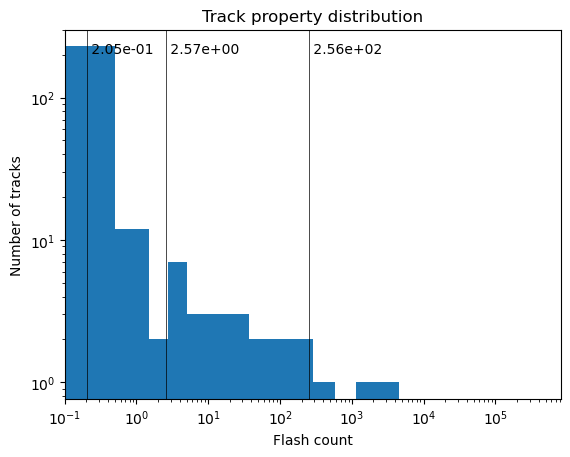

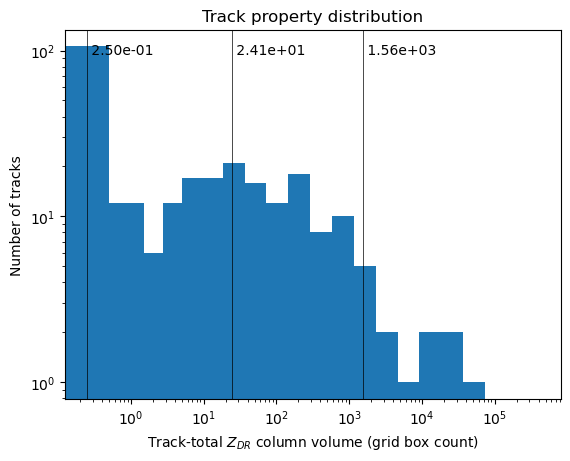

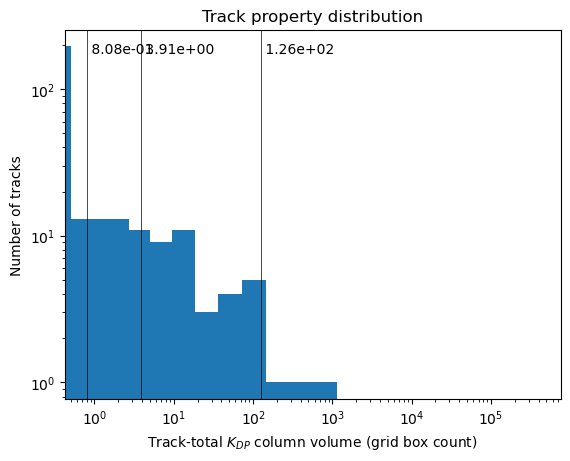

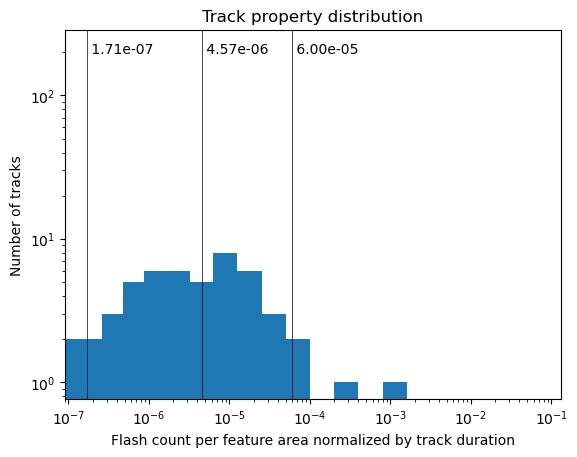

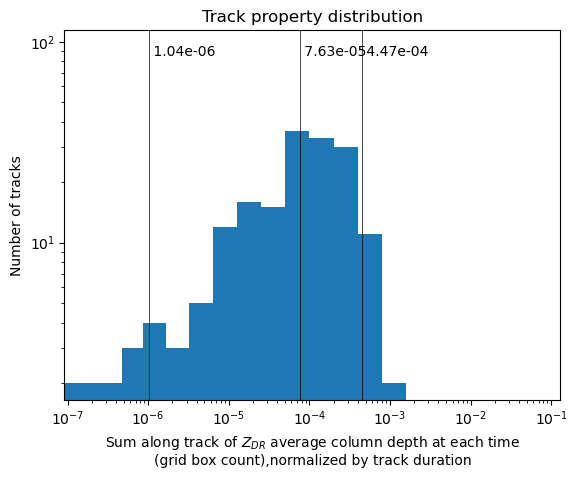

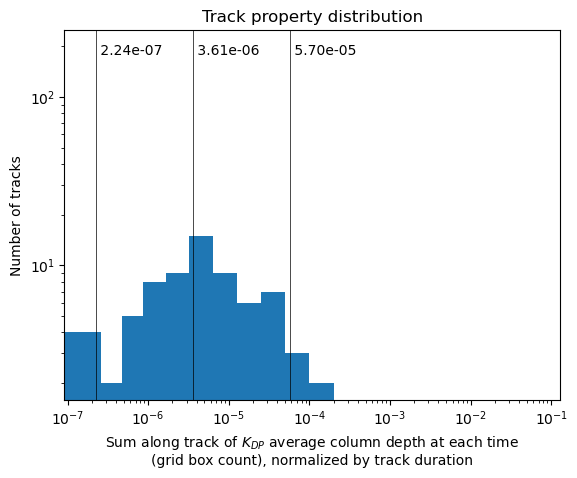

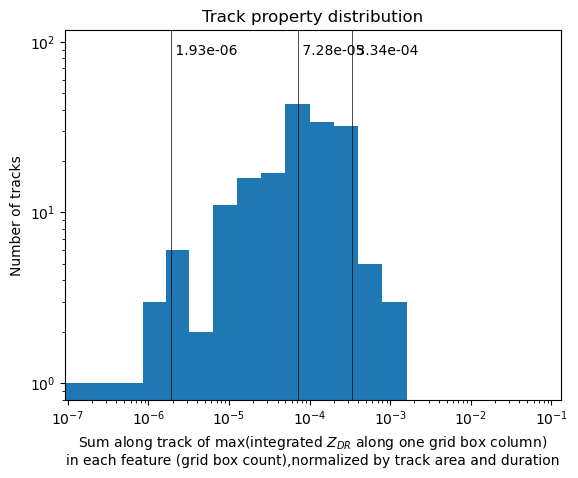

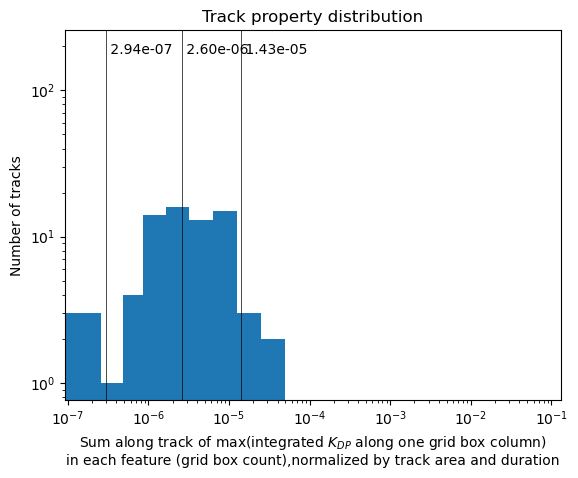

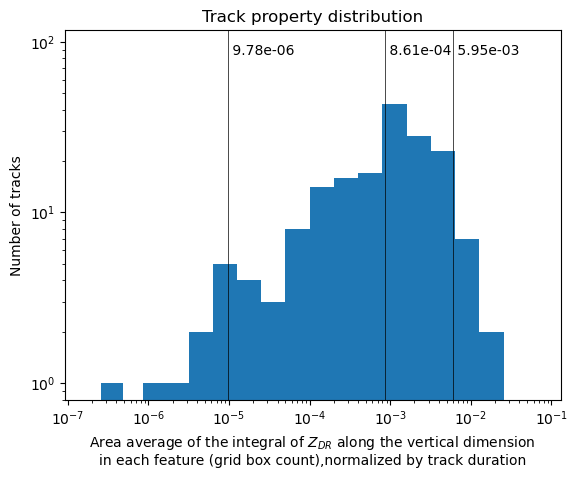

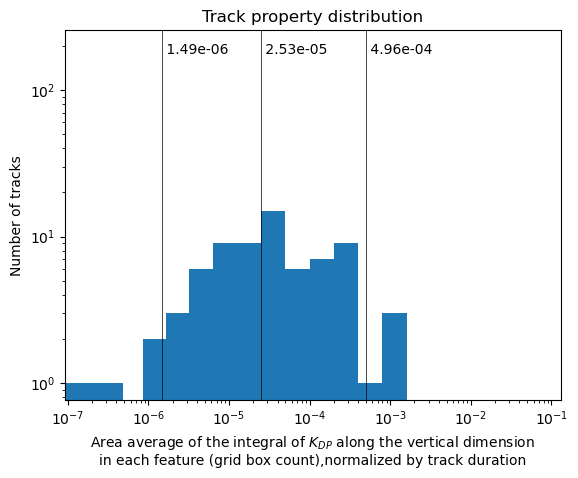

posx and posy should be finite values
posx and posy should be finite values


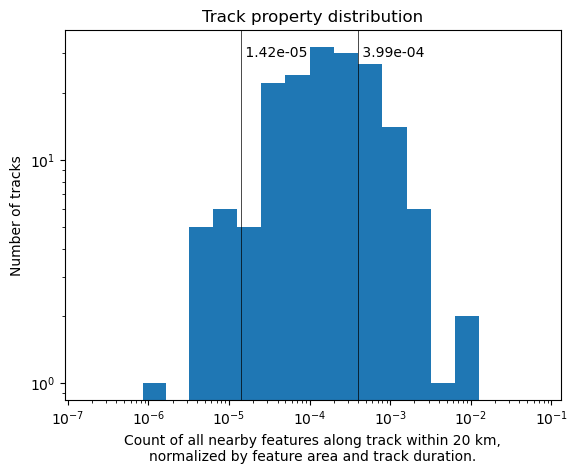

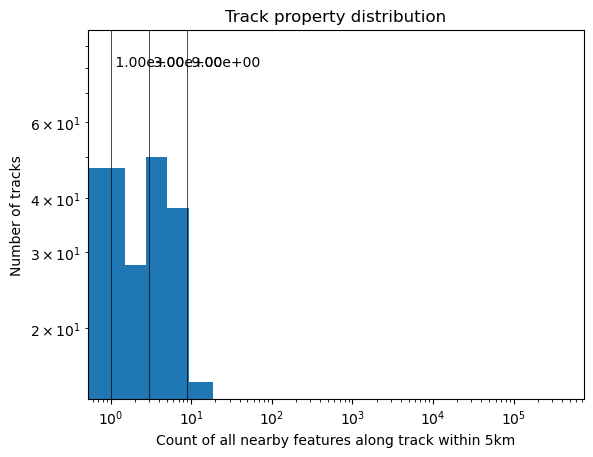

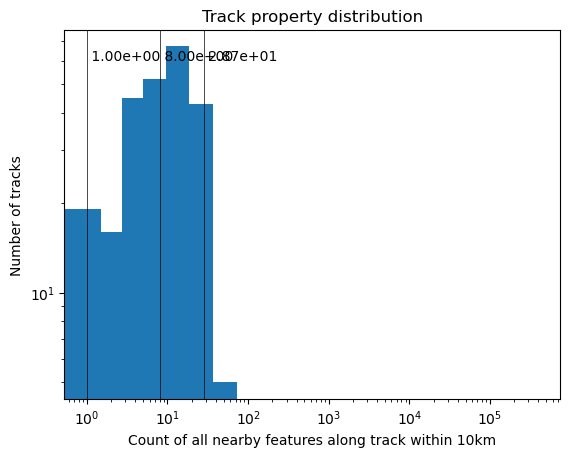

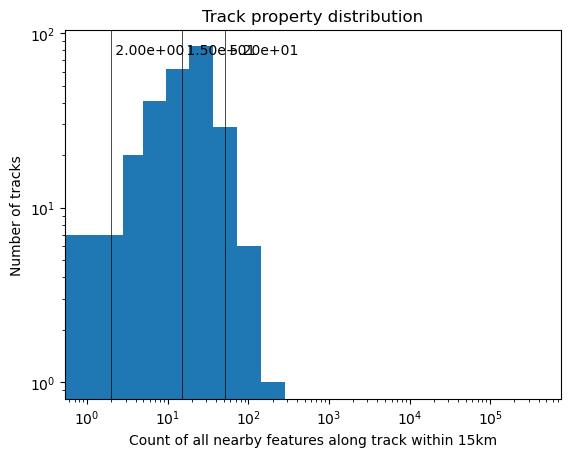

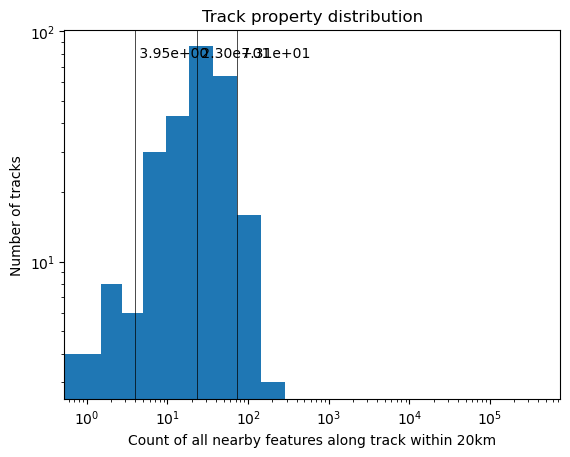

In [5]:
plot_1d_hists(histo_ds)

In [6]:
def plot_2d_hists(histo_ds, plot_hist_names=None):
    # Find the 2D histogram variables
    all_histo_names = sorted(k for k in histo_ds.data_vars.keys() if (len(histo_ds[k].dims)==2))

    # only plot the normed histograms
    if plot_hist_names is None:
        plot_hist_names = [s for s in all_histo_names if s.count('norm') == 2]
    
    hist_count = len(plot_hist_names)
    combo_rows = int(np.ceil(hist_count/3))
    fig, axs = plt.subplots(combo_rows,3, figsize=(2*8, 2*combo_rows*2))
    all_axs = axs.flatten()
    
    for axi, var_name in enumerate(plot_hist_names):
        h = histo_ds[var_name]
        ax = all_axs[axi]
        bins = h[h.coords.dims[0]].values, h[h.coords.dims[1]].values
        h.T.plot(levels=17, vmin=0, vmax=8, ax=ax)
        # Need to have the lower limit be the first bin so that it's nonnegative.
        ax.axis((bins[0][1]/10, bins[0][-1], bins[1][1]/10, bins[1][-1]))
        # ax.axis((0.1, 2048, 0.1, 2048))
        ax.set_xscale('log')
        ax.set_yscale('log')

    fig.tight_layout()

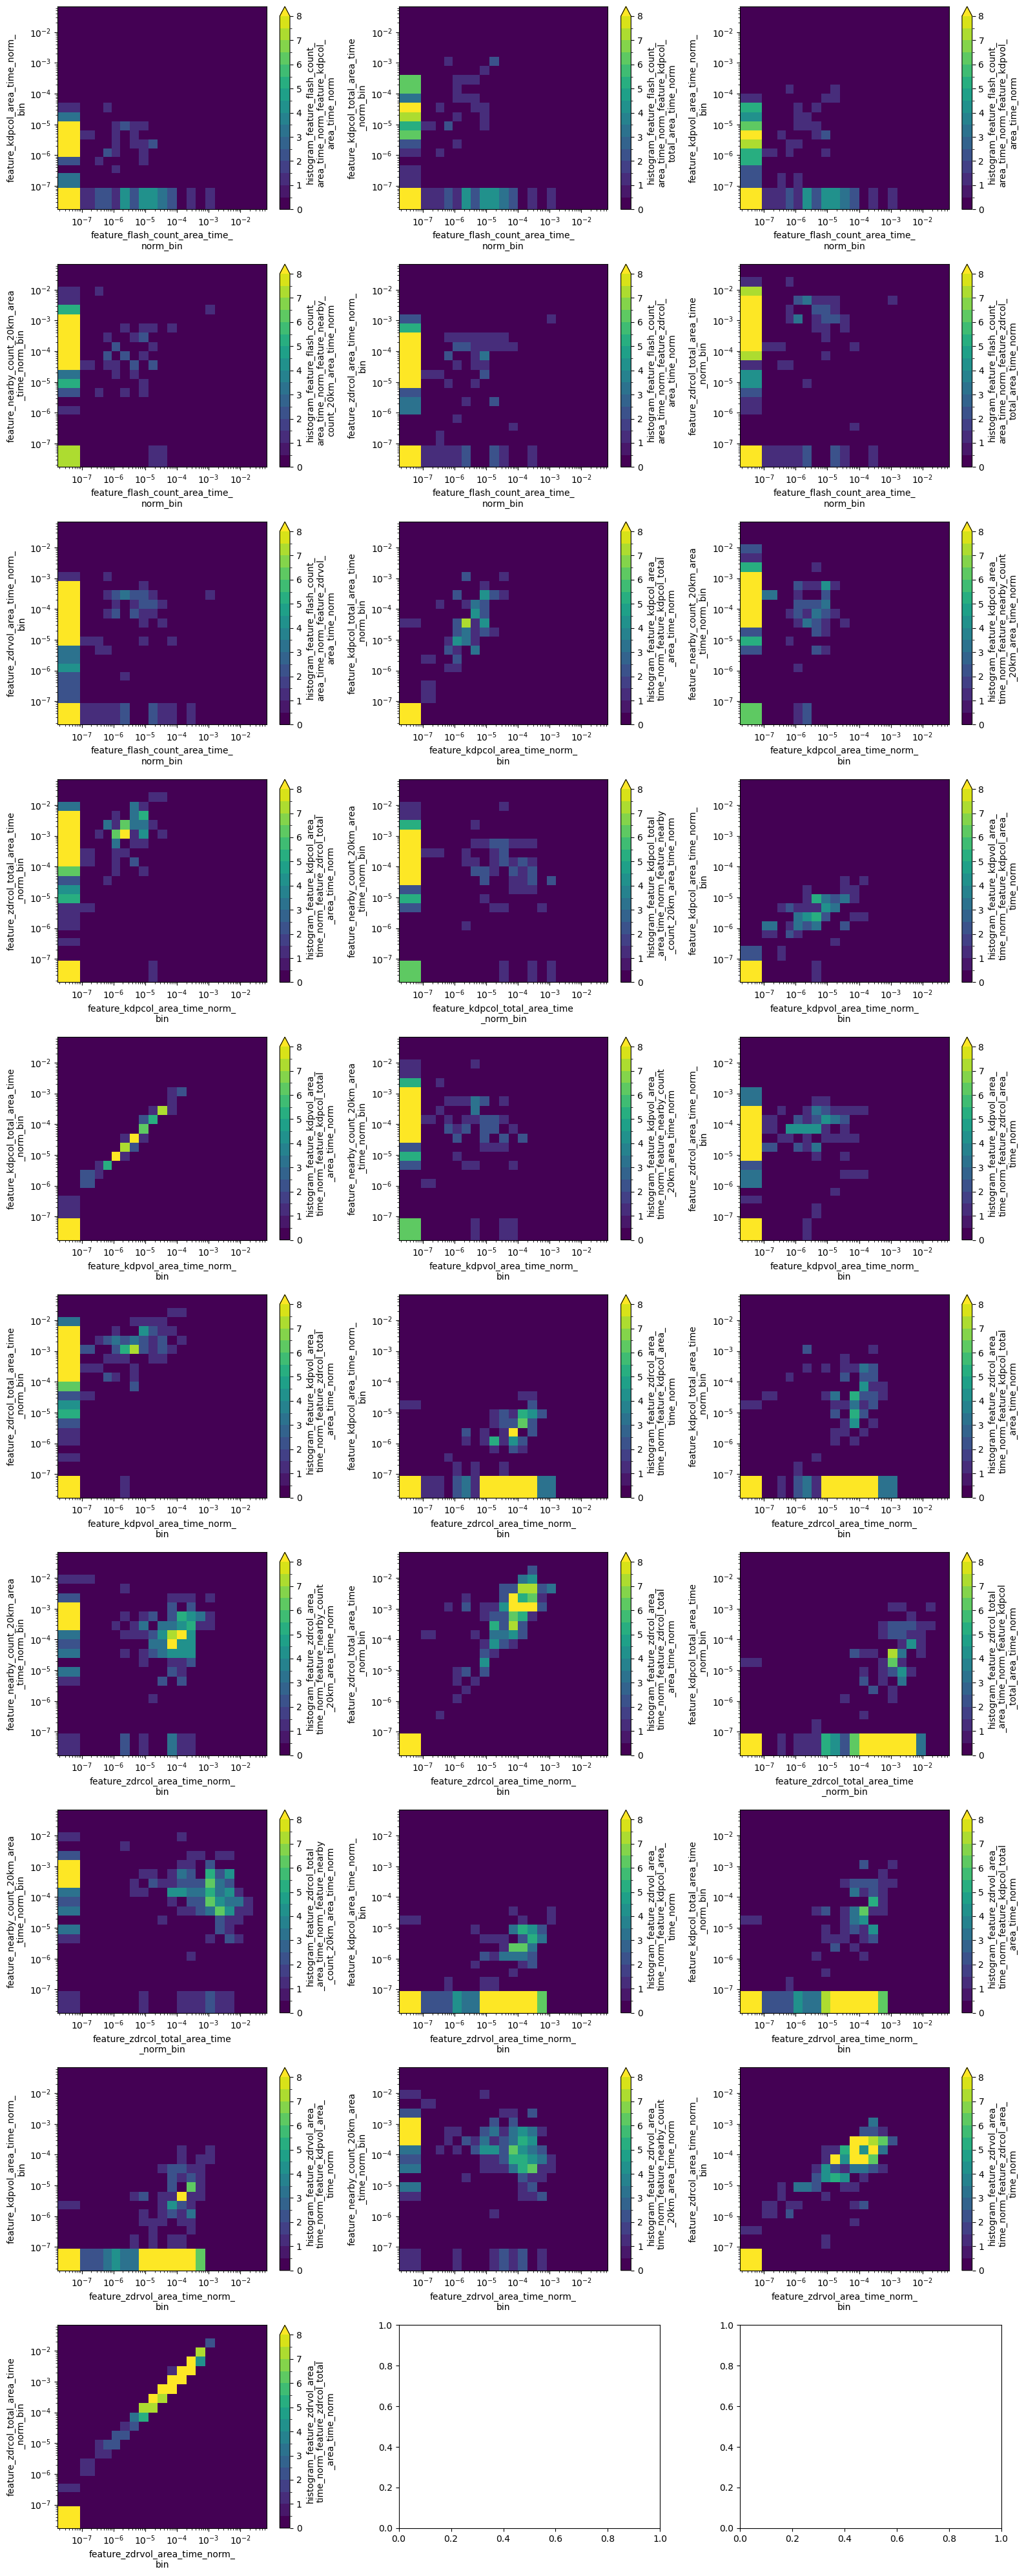

In [7]:
plot_2d_hists(histo_ds)